# Setup

In [ ]:
!pip install umap-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.cluster import KMeans

# Dataset Loading and Cleaing

In [7]:
# Load your dataset
# For example, if you chose the Iris dataset:
dataset_url = './Clustering/Iris.csv'
iris_data  = pd.read_csv(dataset_url)

In [8]:
# Dropping the 'Id' column
iris_data.drop('Id', axis=1, inplace=True)

In [9]:
# Separating features and labels
features = iris_data.drop('Species', axis=1)
labels = iris_data['Species']

In [10]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply UMAP

In [11]:
# Applying UMAP
umap = UMAP(n_neighbors=5, min_dist=0.3, metric='euclidean')
umap_result = umap.fit_transform(scaled_features)

# Clustering

In [12]:
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(umap_result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualization

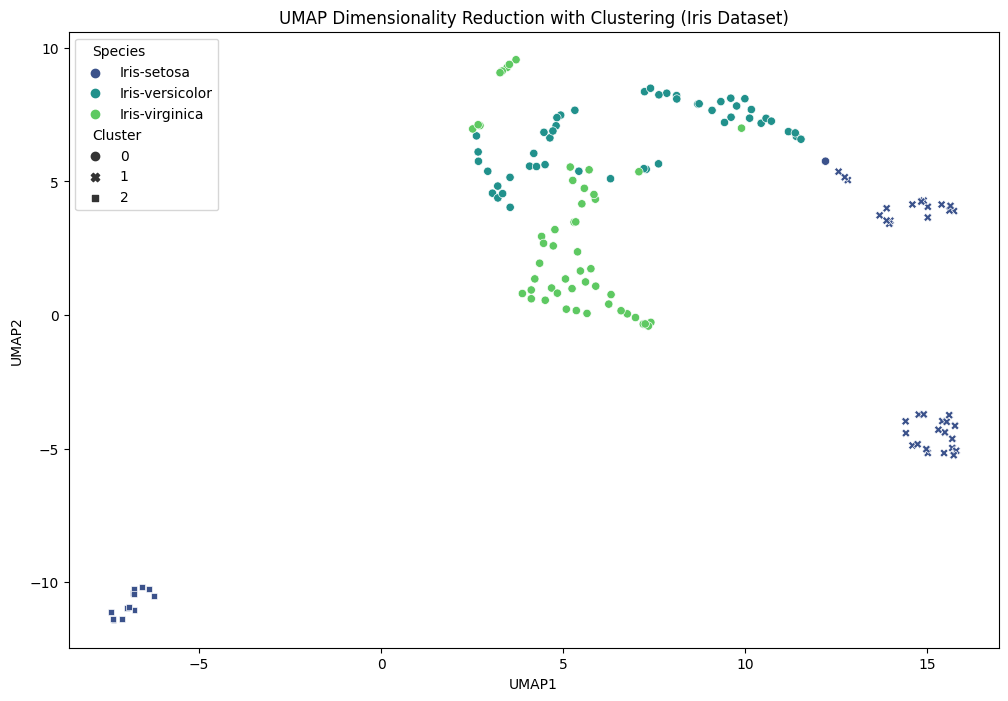

In [13]:
# Preparing data for plotting
plot_data = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
plot_data['Cluster'] = clusters
plot_data['Species'] = labels

# Plotting the UMAP results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_data, x='UMAP1', y='UMAP2', hue='Species', style='Cluster', palette='viridis')
plt.title('UMAP Dimensionality Reduction with Clustering (Iris Dataset)')
plt.show()

From the image, we can see that the UMAP algorithm has done a good job at reducing the dimensions while preserving the structure of the dataset. The KMeans clustering also seems to align well with the true labels, indicating that the algorithm was able to find a good clustering structure.

The Iris-setosa species is clearly separable from the other two species, which is consistent with the fact that Setosa is usually easier to separate using petal and sepal measurements. The Iris-versicolor and Iris-virginica species are more intertwined but still form distinct clusters.